# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


#---Additional Dependencies of choice
import pathlib
import os
import random
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = os.path.join('.','output_data','cities.csv')
                            

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#display(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
#confirm list does not include any duplicates
unique_cities = np.array(cities)
len(unique_cities)

631

In [80]:
#Create Practice sample...change/increase once coding is verified

#---Practice, Testing
#city_sample = random.sample(cities,25)

#---Production, Final
city_sample = random.sample(cities,len(unique_cities))
display(city_sample)


['san patricio',
 'hithadhoo',
 'olafsvik',
 'khorinsk',
 'narsaq',
 'bayan',
 'bafra',
 'bacuit',
 'nagato',
 'eyemouth',
 'khorixas',
 'kruisfontein',
 'vuktyl',
 'toppenish',
 'margate',
 'barrow',
 'saint-augustin',
 'kupang',
 'fort nelson',
 'pokhara',
 'samarai',
 'ciudad bolivar',
 'muros',
 'fianarantsoa',
 'longyearbyen',
 'littleton',
 'ahipara',
 'chernyshevskiy',
 'tornio',
 'ketchikan',
 'hailar',
 'laguna',
 'kormilovka',
 'pafos',
 'nauta',
 'tagusao',
 'nador',
 'atambua',
 'codrington',
 'dikson',
 'smidovich',
 'kyra',
 'karatau',
 'severo-kurilsk',
 'lakes entrance',
 'finnsnes',
 'atherton',
 'amderma',
 'curitibanos',
 'nagar karnul',
 'airai',
 'rockhampton',
 'tutoia',
 'senador guiomard',
 'comodoro rivadavia',
 'victoria',
 'iqaluit',
 'illoqqortoormiut',
 'polunochnoye',
 'ampanihy',
 'mondeville',
 'richards bay',
 'kinablangan',
 'komsomolskiy',
 'bereda',
 'kaitangata',
 'talaya',
 'zverinogolovskoye',
 'isangel',
 'husavik',
 'mangrol',
 'lake havasu city

In [85]:
#---Weather API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#---query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [86]:
test_city = city_sample[0]
print(test_city)

san patricio


In [87]:
#Test response to evaluate data structure
test = requests.get(query_url + test_city).json()
print('===========================')
pprint(test)
print('===========================')

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 28.017, 'lon': -97.5169},
 'dt': 1619269405,
 'id': 4726521,
 'main': {'feels_like': 23.51,
          'humidity': 94,
          'pressure': 1010,
          'temp': 22.73,
          'temp_max': 24,
          'temp_min': 22},
 'name': 'San Patricio',
 'sys': {'country': 'US',
         'id': 5629,
         'sunrise': 1619265348,
         'sunset': 1619312408,
         'type': 1},
 'timezone': -18000,
 'visibility': 3219,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 350, 'speed': 1.54}}


In [107]:
# desired elements to extract
lat = []
temp = []
hum = []
clouds = []
wind = []
cities_f = []
#----Additional fields for part 2 (VacationPy)
lon = []
tempM = []

# Loop through the list of cities and perform a request for data on each
#---- If I'm being honest, I found the following for/in comprehension via google (stack overflow) 
#---- though there was a similar concept show in the day 3 activities, but since I already had this method in place I just rolled with it. 
for c, city in enumerate(city_sample, start=1):
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity']) 
        wind.append(response['wind']['speed'])
        #----clouds.append(response['weather'][0]['description']) --- accidently brought in non-numeric cloud conditions
        clouds.append(response['clouds']['all'])
        #----bring two additional fields to be used in part 2 (VacationPy)
        lon.append(response['coord']['lon'])
        tempM.append(response['main']['temp_max'])        
        cities_f.append(city)
        print(c,city)
    
    except KeyError:
        print(f"{c} {city} ----- NOT FOUND")
    
    

1 san patricio
2 hithadhoo
3 olafsvik
4 khorinsk
5 narsaq
6 bayan
7 bafra
8 bacuit ----- NOT FOUND
9 nagato
10 eyemouth
11 khorixas
12 kruisfontein
13 vuktyl
14 toppenish
15 margate
16 barrow
17 saint-augustin
18 kupang
19 fort nelson
20 pokhara
21 samarai
22 ciudad bolivar
23 muros
24 fianarantsoa
25 longyearbyen
26 littleton
27 ahipara
28 chernyshevskiy
29 tornio
30 ketchikan
31 hailar
32 laguna
33 kormilovka
34 pafos
35 nauta
36 tagusao
37 nador
38 atambua
39 codrington
40 dikson
41 smidovich
42 kyra
43 karatau
44 severo-kurilsk
45 lakes entrance
46 finnsnes
47 atherton
48 amderma ----- NOT FOUND
49 curitibanos
50 nagar karnul
51 airai
52 rockhampton
53 tutoia
54 senador guiomard
55 comodoro rivadavia
56 victoria
57 iqaluit
58 illoqqortoormiut ----- NOT FOUND
59 polunochnoye
60 ampanihy
61 mondeville
62 richards bay
63 kinablangan
64 komsomolskiy
65 bereda
66 kaitangata
67 talaya
68 zverinogolovskoye
69 isangel
70 husavik
71 mangrol
72 lake havasu city
73 anlu
74 kushima
75 kadoshki

567 saurimo
568 ola
569 shahr-e kord
570 punta arenas
571 tomari
572 huarmey
573 bogale
574 tomatlan
575 acari
576 lewistown
577 hohhot
578 atar
579 antofagasta
580 ramygala
581 port lincoln
582 pevek
583 biak
584 muroto
585 esperance
586 kudat
587 kargasok
588 krasnousolskiy ----- NOT FOUND
589 russell
590 sentyabrskiy ----- NOT FOUND
591 rockport
592 montepuez
593 brainerd
594 altay
595 gidam
596 shitkino
597 agadez
598 mahibadhoo
599 bilibino
600 aguimes
601 san quintin
602 port macquarie
603 la ronge
604 alashtar ----- NOT FOUND
605 ouesso
606 vestmanna
607 roald
608 jijiga
609 juifang ----- NOT FOUND
610 vila
611 mashhad
612 padang
613 vanavara
614 oranjemund
615 qujing
616 mount gambier
617 oranjestad
618 port-cartier
619 jalu
620 puerto del rosario
621 busselton
622 havoysund
623 elko
624 katsuura
625 cockburn town
626 camenca
627 faya
628 bom jesus
629 newport
630 kloulklubed
631 jumla


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
#---cities found
len(cities_f)

581

In [111]:
#---Combine response lists into a datafram
city_results = pd.DataFrame({
    'City' : cities_f,
    'Latitude': lat,
    'Longitude' : lon,
    'Temperature' : temp,
    'Humidity' : hum,
    'Windspeed' : wind,
    'Cloudiness' : clouds,
    'Max Temp' : tempM
})

#print(pathlib.Path.cwd())
city_results.to_csv(output_data_file, index=False)


city_results

,City,Latitude,Longitude,Temperature,Humidity,Windspeed,Cloudiness,Max Temp
0,san patricio,28.0170,-97.5169,34.80,13,7.20,1,36.00
1,hithadhoo,-0.6000,73.0833,28.47,69,3.26,13,28.47
2,olafsvik,64.8945,-23.7142,7.02,82,7.77,100,7.02
3,khorinsk,52.1657,109.7726,6.22,27,0.60,100,6.22
4,narsaq,60.9167,-46.0500,14.00,30,13.38,75,14.00
...,...,...,...,...,...,...,...,...
576,faya,18.3851,42.4509,14.50,72,7.20,75,15.00
577,bom jesus,-9.0744,-44.3586,30.73,51,1.60,100,30.73
578,newport,51.5877,-2.9984,14.50,44,6.69,0,15.00
579,kloulklubed,7.0419,134.2556,28.00,78,5.14,75,28.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [91]:
#  Get the indices of cities that have humidity over 100%.
humid_df = city_results.loc[city_results['Humidity'] >100]
display(humid_df)

,City,Latitude,Temperature,Humidity,Windspeed,Cloudiness


In [92]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_results2 = city_results.drop(city_results[city_results['Humidity']>100].index)
len(city_results2)

581

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot


The below chart illustrates that temperatures increase as you get closer to the equator.


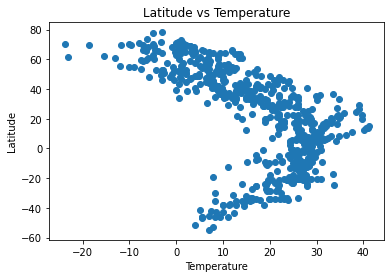

In [93]:


x_values = city_results2['Temperature']
y_values = city_results2['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Latitude vs Temperature')
plt.savefig(os.path.join('.','output_data','Lat_v_Temp.png'))

print()
print("The below chart illustrates that temperatures increase as you get closer to the equator.")
plt.show()


## Latitude vs. Humidity Plot


The below chart illustrates that there is no preceivable correlation between latitude and humidity.


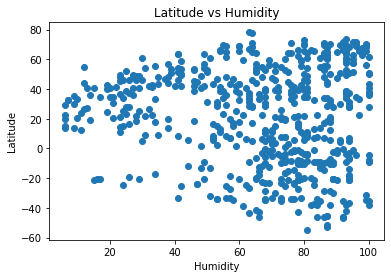

In [94]:
x_values = city_results2['Humidity']
y_values = city_results2['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Latitude vs Humidity')
plt.savefig(os.path.join('.','output_data','Lat_v_Hum.png'))

print()
print("The below chart illustrates that there is no preceivable correlation between latitude and humidity.")
plt.show()


## Latitude vs. Cloudiness Plot


While there appears to be some sort of linear groupings, I cannot begin to deffer what the relationship could be.


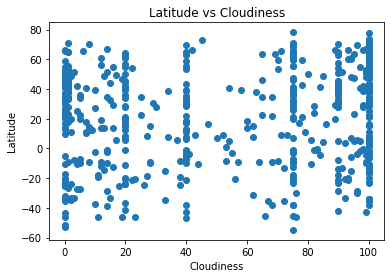

In [95]:
x_values = city_results2['Cloudiness']
y_values = city_results2['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Latitude vs Cloudiness')
plt.savefig(os.path.join('.','output_data','Lat_v_Clo.png'))

print()
print("While there appears to be some sort of linear groupings, I cannot begin to deffer what the relationship could be.")
plt.show()


## Latitude vs. Wind Speed Plot


While I wouldn't say there is a strong correlation between latitude and windspeed, perhads the northern hemisphere tends to lean a little bit windier.


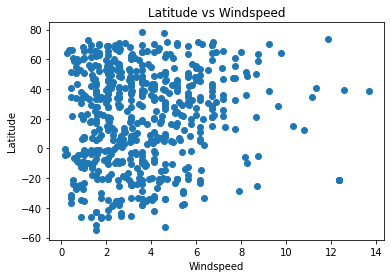

In [97]:
x_values = city_results2['Windspeed']
y_values = city_results2['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Windspeed')
plt.ylabel('Latitude')
plt.title('Latitude vs Windspeed')
plt.savefig(os.path.join('.','output_data','Lat_v_Win.png'))

print()
print("While I wouldn't say there is a strong correlation between latitude and windspeed, perhads the northern hemisphere tends to lean a little bit windier.")
plt.show()


## Linear Regression

In [63]:
#--- break out results into two seperate dataframes for North and South


north = city_results2.loc[(city_results2['Latitude'] > 0)]
south = city_results2.loc[(city_results2['Latitude'] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.89


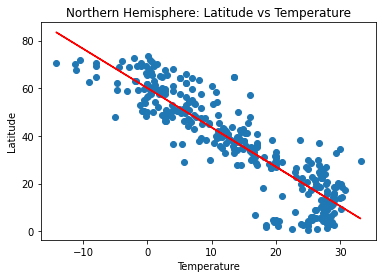

In [98]:
#---I'm assuming we going to stick with temp (vs temp_max) to be consistent with the earlier scatter plot created.

x_values = north['Temperature']
y_values = north['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere: Latitude vs Temperature')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.68


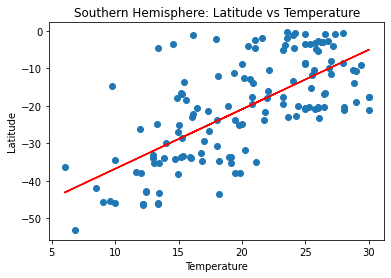

In [99]:
x_values = south['Temperature']
y_values = south['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere: Latitude vs Temperature')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.03


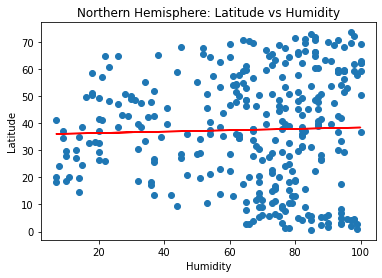

In [100]:
x_values = north['Humidity']
y_values = north['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere: Latitude vs Humidity')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15


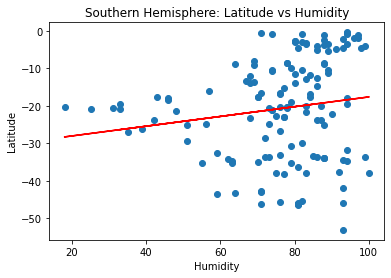

In [101]:
x_values = south['Humidity']
y_values = south['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere: Latitude vs Humidity')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.08


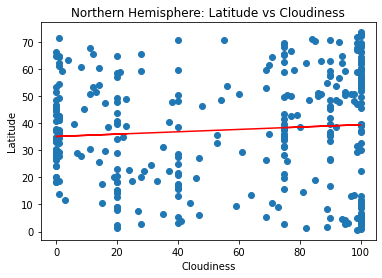

In [102]:
x_values = north['Cloudiness']
y_values = north['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere: Latitude vs Cloudiness')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.18


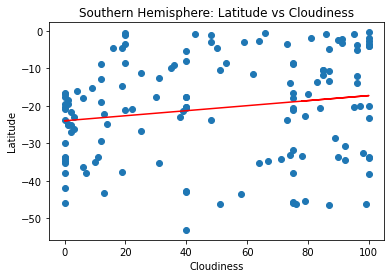

In [103]:
x_values = south['Cloudiness']
y_values = south['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere: Latitude vs Cloudiness')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.05


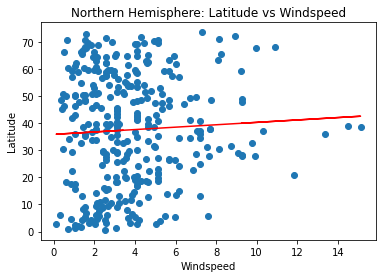

In [104]:
x_values = north['Windspeed']
y_values = north['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Windspeed')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere: Latitude vs Windspeed')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.14


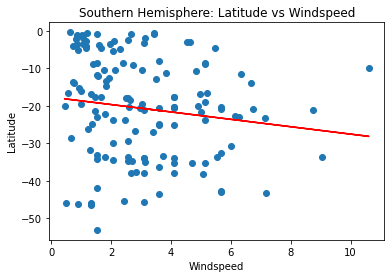

In [105]:
x_values = south['Windspeed']
y_values = south['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Windspeed')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere: Latitude vs Windspeed')

#---Add regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#---Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()